In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from our csv
dataframe = pd.read_csv('heart.csv')

# Select out Numeric and Categorical Features
binary_features = ['FastingBS', 'Sex', 'ExerciseAngina']
numeric_features = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_feature = "HeartDisease"

In [ ]:
dataframe.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dataframe.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
correlations = dataframe.corr()
correlations

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


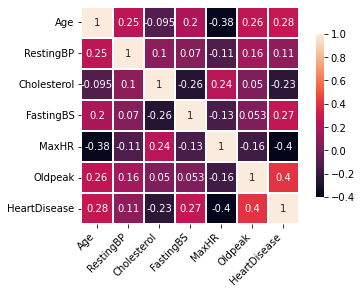

In [ ]:
correlations_heatmap = sns.heatmap(correlations, annot=True, square=True, linewidth=1, cbar_kws={'shrink' : 0.75})
correlations_heatmap.set_xticklabels(correlations_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

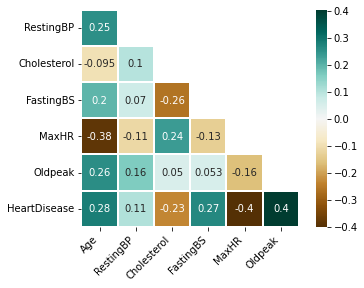

In [ ]:
trianglular_correlations = correlations.drop('Age', axis=0).drop('HeartDisease', axis=1)
mask = np.triu(np.ones_like(trianglular_correlations, dtype=bool), k=1)
heatmap = sns.heatmap(trianglular_correlations, mask=mask, annot=True, square=True, linewidth=1, cmap='BrBG')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

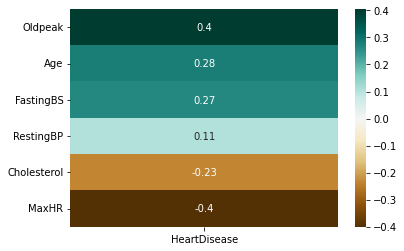

In [ ]:
heart_disease_corr = correlations[['HeartDisease']].drop('HeartDisease', axis=0).sort_values(by='HeartDisease', ascending=False)
heatmap = sns.heatmap(heart_disease_corr, annot=True, cmap='BrBG')

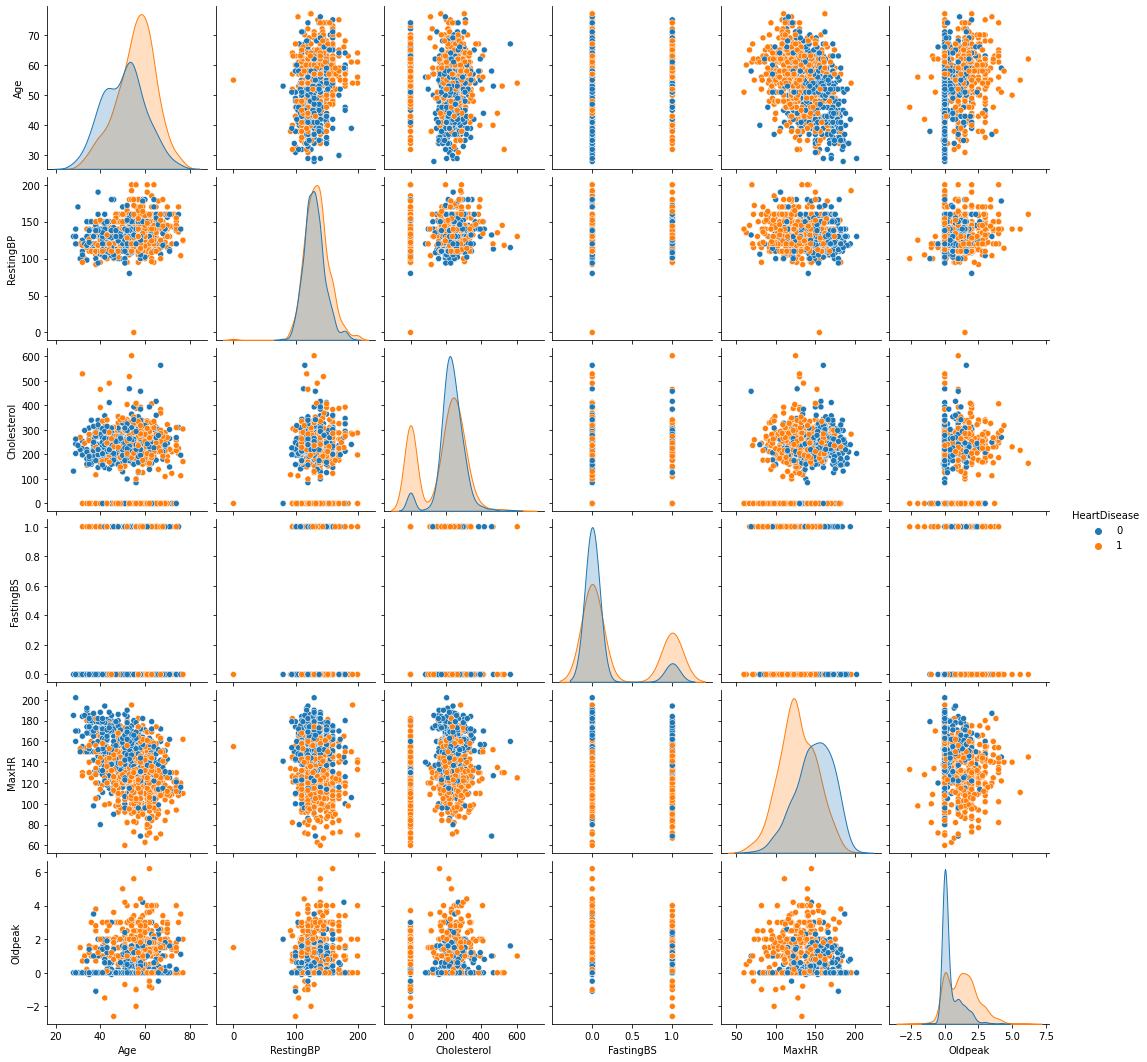

In [ ]:
relationships_pairplot = sns.pairplot(dataframe, hue=label_feature)

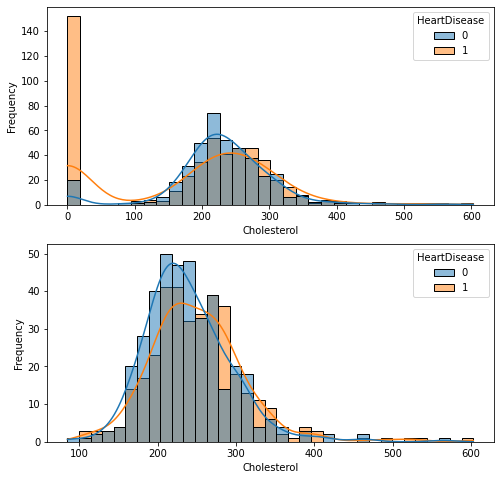

In [ ]:
# Remove dirty data and outliers
fig, axs = plt.subplots(2, 1, figsize=(8,8))

sns.histplot(dataframe, x='Cholesterol', hue=label_feature, kde=True, ax=axs[0])
axs[0].set_ylabel('Frequency')
# # Remove cases where Cholesterol is 0
after = dataframe[(dataframe['Cholesterol'] != 0)]

sns.histplot(after, x='Cholesterol', hue=label_feature, kde=True, ax=axs[1])
axs[1].set_ylabel('Frequency')
plt.show()

# # Let's remove other outliers later

In [ ]:
# Remove data where Chol = 0 and RestingBP = 0
dataframe = after
dataframe = dataframe[(dataframe['RestingBP'] != 0)]

dataframe.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
pos = dataframe[dataframe[label_feature] == 1]
pos.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.0
mean,55.851124,136.154494,251.061798,0.230337,130.550562,1.457865,1.0
std,8.820768,17.963226,62.462713,0.421641,22.299377,1.148383,0.0
min,31.000000,92.000000,100.000000,0.000000,71.000000,0.000000,1.0
25%,50.000000,123.750000,212.000000,0.000000,115.000000,0.500000,1.0
50%,57.000000,136.000000,246.000000,0.000000,130.000000,1.500000,1.0
75%,62.000000,145.000000,283.250000,0.000000,147.000000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


In [ ]:
neg = dataframe[dataframe[label_feature] == 0]
neg.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.0
mean,50.171795,130.164103,238.769231,0.110256,149.058974,0.393846,0.0
std,9.307029,16.137065,55.394617,0.313611,23.111646,0.677674,0.0
min,28.000000,94.000000,85.000000,0.000000,69.000000,-0.100000,0.0
25%,43.000000,120.000000,203.000000,0.000000,135.000000,0.000000,0.0
50%,51.000000,130.000000,231.500000,0.000000,150.500000,0.000000,0.0
75%,56.000000,140.000000,269.000000,0.000000,167.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


In [ ]:
# Look at the pairplot after the data has been cleaned
dataframe = after
# cleaned_relationships_pairplot = sns.pairplot(dataframe, hue=label_feature)

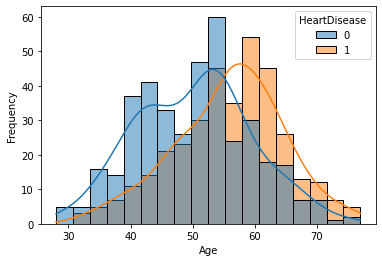

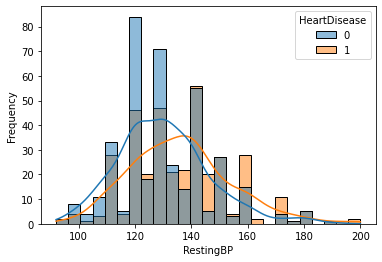

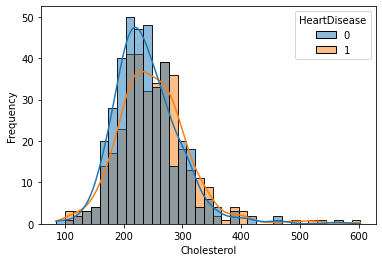

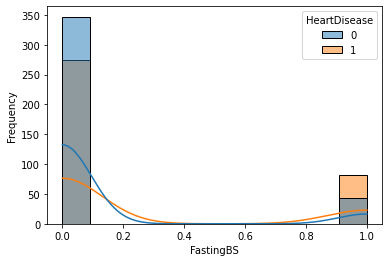

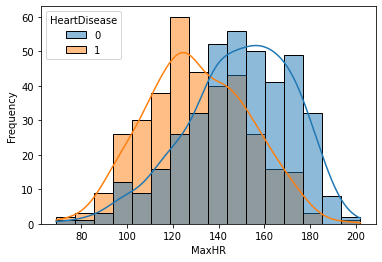

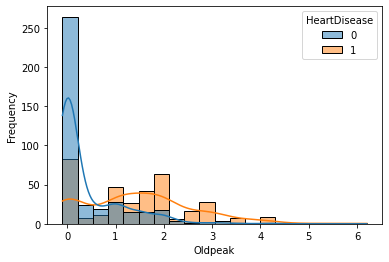

In [ ]:
#sns.set_theme()
for feature in numeric_features:
  histogram = sns.histplot(dataframe, x=feature, hue=label_feature, kde=True)
  histogram.set_ylabel('Frequency')
  plt.show()

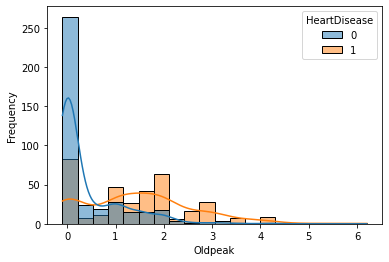

In [ ]:
histogram = sns.histplot(dataframe, x='Oldpeak', hue=label_feature, kde=True)
histogram.set_ylabel('Frequency')
plt.show()

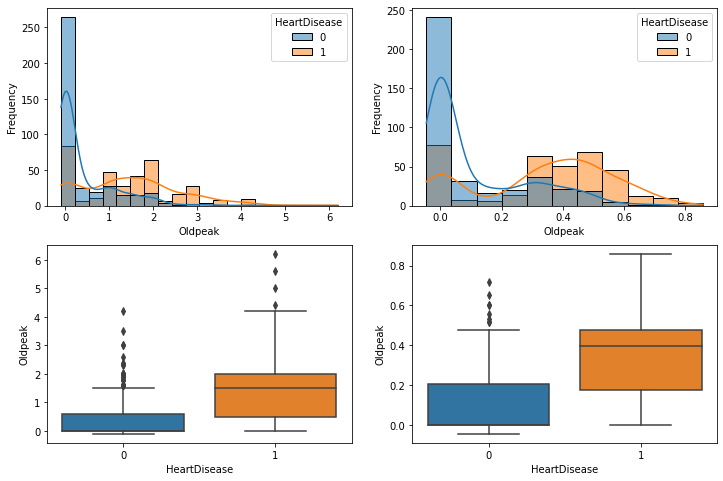

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

sns.histplot(dataframe, x='Oldpeak', hue=label_feature, kde=True, ax=axs[0, 0])
axs[0, 0].set_ylabel('Frequency')

sns.boxplot(data=dataframe, x=label_feature, y='Oldpeak', ax=axs[1, 0])

# Log10scaled Oldpeak
log10scaled = dataframe.copy()
log10scaled['Oldpeak'] = np.log10(log10scaled['Oldpeak'] + 1)

sns.histplot(log10scaled, x='Oldpeak', hue=label_feature, kde=True, ax=axs[0, 1])
axs[0, 1].set_ylabel('Frequency')

sns.boxplot(data=log10scaled, x=label_feature, y='Oldpeak', ax=axs[1, 1])
plt.show()

In [ ]:
dataframe = log10scaled

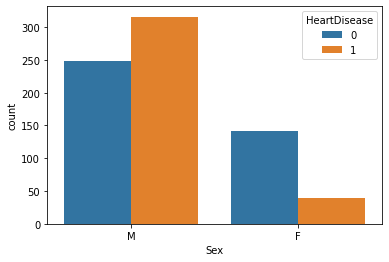

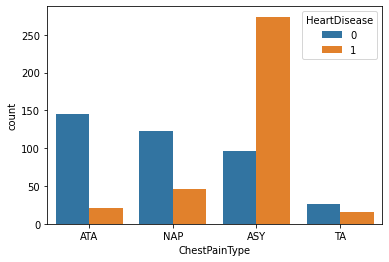

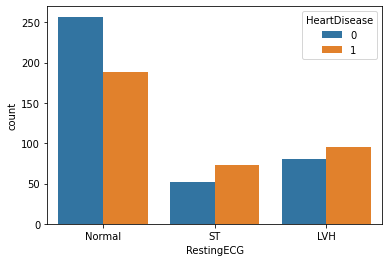

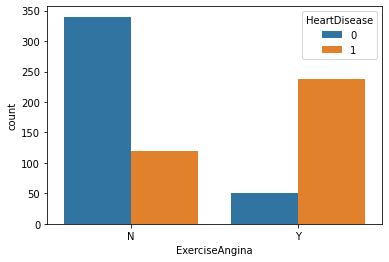

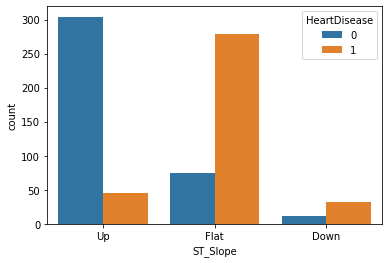

In [ ]:
for feature in categorical_features:
  countplot = sns.countplot(data=dataframe, x=feature, hue=label_feature)
  plt.show()

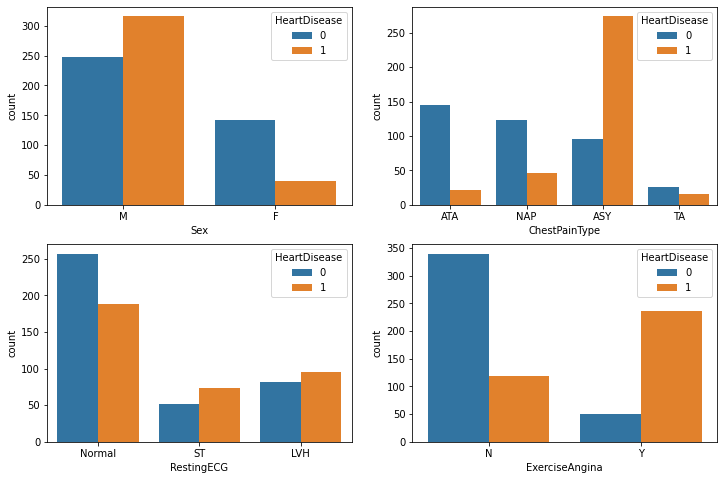

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))

for ax, feature in zip(axs.ravel(), categorical_features):
  sns.countplot(data=dataframe, x=feature, hue=label_feature, ax=ax)

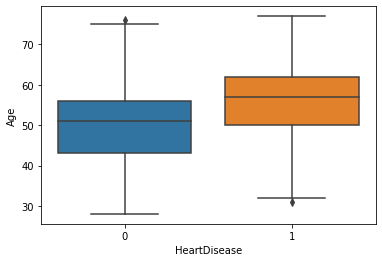

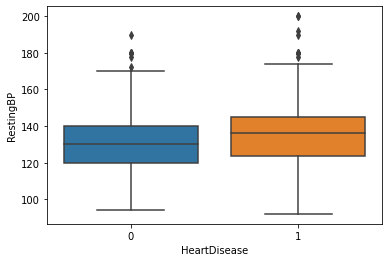

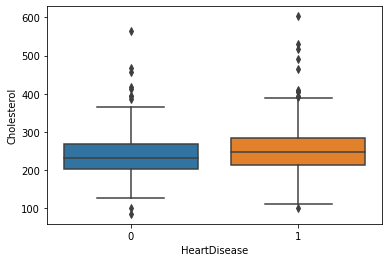

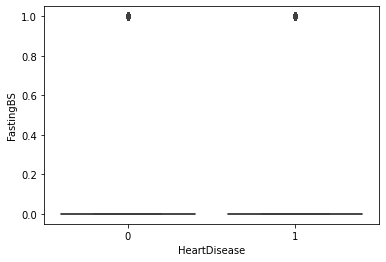

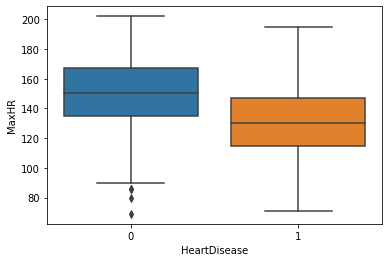

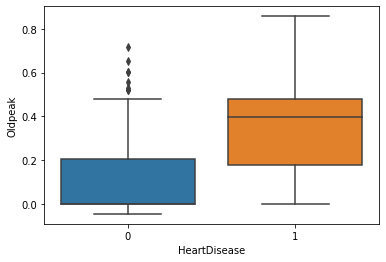

In [ ]:
for feature in numeric_features:
  boxplot = sns.boxplot(data=dataframe, x=label_feature, y=feature)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate X and y
X = dataframe[numeric_features + categorical_features]
y = dataframe[label_feature]

# Create Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create copies of X_train and X_test data
X_train_all = X_train.copy()
X_test_all = X_test.copy()

In [ ]:
# One Hot Encoding
def oneHotEncoding(X, categorical_features=categorical_features):
  oneHotEncoded_features = []
  for categorical_feature in categorical_features:
    unique_values = sorted(X[categorical_feature].unique())
    for unique in unique_values:
      column_name = f'{categorical_feature}-OneHot-{unique}'
      X[column_name] = (X[categorical_feature] == unique).apply(int)
      oneHotEncoded_features.append(column_name)
  return oneHotEncoded_features

# Figure out target encoded means
combined = pd.concat([X_train, y_train], axis=1) 
means = {feature : combined.groupby(feature)[label_feature].mean() for feature in categorical_features}

# Target Encoding
def targetEncoding(X, categorical_features=categorical_features, means=means):
  targetEncoded_features = []
  for categorical_feature in categorical_features:
    column_name = f'{categorical_feature}-TargetEncoded'

    X[column_name] = X[categorical_feature].map(means[categorical_feature])

    targetEncoded_features.append(column_name)
  return targetEncoded_features

# Standard Scaler
def standardScaler(X, numeric_features=numeric_features):
  standardScaled_features = []
  for numeric_feature in numeric_features:
    mean = X[numeric_feature].mean()
    standard_deviation = X[numeric_feature].std()
    column_name = f'{numeric_feature}-Scaled'
    X[column_name] = (X[numeric_feature] - mean) / standard_deviation
    standardScaled_features.append(column_name)
  return standardScaled_features

# Min Max Normalization
def minMaxNormalization(X, numeric_features=numeric_features):
  minMax_features = []
  for numeric_feature in numeric_features:
    max = X[numeric_feature].max()
    min = X[numeric_feature].min()
    column_name = f'{numeric_feature}-MinMax'
    X[column_name] = (X[numeric_feature] - min) / (max - min)
    minMax_features.append(column_name)
  return minMax_features

In [ ]:
oneHotEncoded_features = oneHotEncoding(X_train_all)
targetEncoded_features = targetEncoding(X_train_all)
standardScaled_features = standardScaler(X_train_all)
minMax_features = minMaxNormalization(X_train_all)

oneHotEncoded_features2 = oneHotEncoding(X_test_all)
targetEncoded_features2 = targetEncoding(X_test_all)
standardScaled_features2 = standardScaler(X_test_all)
minMax_features2 = minMaxNormalization(X_test_all)

kitchen_sink = oneHotEncoded_features + targetEncoded_features + standardScaled_features + minMax_features

feature_experiments = [
  numeric_features + oneHotEncoded_features,
  standardScaled_features + oneHotEncoded_features,
  standardScaled_features + targetEncoded_features,
  minMax_features + oneHotEncoded_features,
  minMax_features + targetEncoded_features,

  kitchen_sink
]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, auc

def getScores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, zero_division=0)
  recall = recall_score(y_true, y_pred)
  precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred)
  pr_auc = auc(recalls, precisions)
  return accuracy, pr_auc, precision, recall

In [ ]:
# Storing various information about our experiment
information = [
  'Experiment Name', 
  'Features', 
  'Model Type', 
  'Epochs', 
  'Hyperparameters', 
  'Training Accuracy',
  'Testing Accuracy',
  'Training PR-AUC',
  'Testing PR-AUC',
  'Training Precision',
  'Testing Precision',
  'Training Recall',
  'Testing Recall'
]

data = {column : list() for column in information}

def addData(name, features, model_type, hyperparameters, training_scores, testing_scores, epochs='', data=data):
  data['Experiment Name'].append(name)
  data['Features'].append(features)
  data['Model Type'].append(model_type)
  data['Epochs'].append(epochs)
  data['Hyperparameters'].append(hyperparameters)
  data['Training Accuracy'].append(training_scores[0])
  data['Testing Accuracy'].append(testing_scores[0])
  data['Training PR-AUC'].append(training_scores[1])
  data['Testing PR-AUC'].append(testing_scores[1])
  data['Training Precision'].append(training_scores[2])
  data['Testing Precision'].append(testing_scores[2])
  data['Training Recall'].append(training_scores[3])
  data['Testing Recall'].append(testing_scores[3])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DEPTHS = list(range(1, 11))

for features in feature_experiments:
  for depth in DEPTHS:
    X_train = X_train_all[features]
    X_test = X_test_all[features]

    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    addData(name='Tree', features=';'.join(X_train.columns), model_type='DecisionTreeClassifier', hyperparameters=f'{depth}', 
            training_scores=getScores(y_train, y_pred_train), testing_scores=getScores(y_test, y_pred_test))

In [ ]:
df = pd.DataFrame(data)
df.head()

,Experiment Name,Features,Model Type,Epochs,Hyperparameters,Training Accuracy,Testing Accuracy,Training PR-AUC,Testing PR-AUC,Training Precision,Testing Precision,Training Recall,Testing Recall
0,Tree,Age;RestingBP;Cholesterol;FastingBS;MaxHR;Oldp...,DecisionTreeClassifier,,1,0.815436,0.860000,0.847759,0.899867,0.765079,0.853659,0.870036,0.886076
1,Tree,Age;RestingBP;Cholesterol;FastingBS;MaxHR;Oldp...,DecisionTreeClassifier,,2,0.815436,0.860000,0.847759,0.899867,0.765079,0.853659,0.870036,0.886076
2,Tree,Age;RestingBP;Cholesterol;FastingBS;MaxHR;Oldp...,DecisionTreeClassifier,,3,0.855705,0.860000,0.880839,0.909448,0.844765,0.902778,0.844765,0.822785
3,Tree,Age;RestingBP;Cholesterol;FastingBS;MaxHR;Oldp...,DecisionTreeClassifier,,4,0.869128,0.886667,0.891603,0.921756,0.856631,0.897436,0.862816,0.886076
4,Tree,Age;RestingBP;Cholesterol;FastingBS;MaxHR;Oldp...,DecisionTreeClassifier,,5,0.906040,0.886667,0.920673,0.926506,0.887719,0.918919,0.913357,0.860759


In [ ]:
accuracy_sorted = df.sort_values(by=['Testing Accuracy'], ascending=False)
accuracy_sorted.to_csv('DescisionTree.csv')
accuracy_sorted.head(10)

,Experiment Name,Features,Model Type,Epochs,Hyperparameters,Training Accuracy,Testing Accuracy,Training PR-AUC,Testing PR-AUC,Training Precision,Testing Precision,Training Recall,Testing Recall
24,Tree,Age-Scaled;RestingBP-Scaled;Cholesterol-Scaled...,DecisionTreeClassifier,,5,0.906040,0.900000,0.920673,0.936258,0.887719,0.932432,0.913357,0.873418
54,Tree,Sex-OneHot-F;Sex-OneHot-M;ChestPainType-OneHot...,DecisionTreeClassifier,,5,0.906040,0.900000,0.920673,0.936258,0.887719,0.932432,0.913357,0.873418
14,Tree,Age-Scaled;RestingBP-Scaled;Cholesterol-Scaled...,DecisionTreeClassifier,,5,0.906040,0.900000,0.920673,0.936258,0.887719,0.932432,0.913357,0.873418
23,Tree,Age-Scaled;RestingBP-Scaled;Cholesterol-Scaled...,DecisionTreeClassifier,,4,0.869128,0.893333,0.891603,0.927583,0.856631,0.909091,0.862816,0.886076
13,Tree,Age-Scaled;RestingBP-Scaled;Cholesterol-Scaled...,DecisionTreeClassifier,,4,0.869128,0.893333,0.891603,0.927583,0.856631,0.909091,0.862816,0.886076
3,Tree,Age;RestingBP;Cholesterol;FastingBS;MaxHR;Oldp...,DecisionTreeClassifier,,4,0.869128,0.886667,0.891603,0.921756,0.856631,0.897436,0.862816,0.886076
4,Tree,Age;RestingBP;Cholesterol;FastingBS;MaxHR;Oldp...,DecisionTreeClassifier,,5,0.906040,0.886667,0.920673,0.926506,0.887719,0.918919,0.913357,0.860759
55,Tree,Sex-OneHot-F;Sex-OneHot-M;ChestPainType-OneHot...,DecisionTreeClassifier,,6,0.929530,0.880000,0.942382,0.922955,0.927273,0.917808,0.920578,0.848101
53,Tree,Sex-OneHot-F;Sex-OneHot-M;ChestPainType-OneHot...,DecisionTreeClassifier,,4,0.869128,0.880000,0.891603,0.916076,0.856631,0.886076,0.862816,0.886076
34,Tree,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,DecisionTreeClassifier,,5,0.906040,0.873333,0.920673,0.914415,0.887719,0.894737,0.913357,0.860759


Features: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex-OneHot-F', 'Sex-OneHot-M', 'ChestPainType-OneHot-ASY', 'ChestPainType-OneHot-ATA', 'ChestPainType-OneHot-NAP', 'ChestPainType-OneHot-TA', 'RestingECG-OneHot-LVH', 'RestingECG-OneHot-Normal', 'RestingECG-OneHot-ST', 'ExerciseAngina-OneHot-N', 'ExerciseAngina-OneHot-Y', 'ST_Slope-OneHot-Down', 'ST_Slope-OneHot-Flat', 'ST_Slope-OneHot-Up']


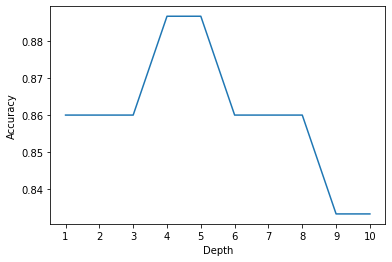

Features: ['Age-Scaled', 'RestingBP-Scaled', 'Cholesterol-Scaled', 'FastingBS-Scaled', 'MaxHR-Scaled', 'Oldpeak-Scaled', 'Sex-OneHot-F', 'Sex-OneHot-M', 'ChestPainType-OneHot-ASY', 'ChestPainType-OneHot-ATA', 'ChestPainType-OneHot-NAP', 'ChestPainType-OneHot-TA', 'RestingECG-OneHot-LVH', 'RestingECG-OneHot-Normal', 'RestingECG-OneHot-ST', 'ExerciseAngina-OneHot-N', 'ExerciseAngina-OneHot-Y', 'ST_Slope-OneHot-Down', 'ST_Slope-OneHot-Flat', 'ST_Slope-OneHot-Up']


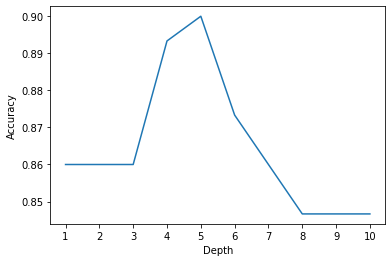

Features: ['Age-Scaled', 'RestingBP-Scaled', 'Cholesterol-Scaled', 'FastingBS-Scaled', 'MaxHR-Scaled', 'Oldpeak-Scaled', 'Sex-TargetEncoded', 'ChestPainType-TargetEncoded', 'RestingECG-TargetEncoded', 'ExerciseAngina-TargetEncoded', 'ST_Slope-TargetEncoded']


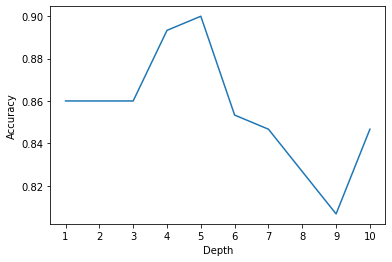

Features: ['Age-MinMax', 'RestingBP-MinMax', 'Cholesterol-MinMax', 'FastingBS-MinMax', 'MaxHR-MinMax', 'Oldpeak-MinMax', 'Sex-OneHot-F', 'Sex-OneHot-M', 'ChestPainType-OneHot-ASY', 'ChestPainType-OneHot-ATA', 'ChestPainType-OneHot-NAP', 'ChestPainType-OneHot-TA', 'RestingECG-OneHot-LVH', 'RestingECG-OneHot-Normal', 'RestingECG-OneHot-ST', 'ExerciseAngina-OneHot-N', 'ExerciseAngina-OneHot-Y', 'ST_Slope-OneHot-Down', 'ST_Slope-OneHot-Flat', 'ST_Slope-OneHot-Up']


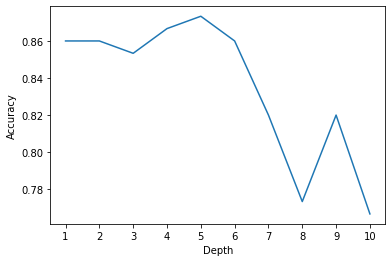

Features: ['Age-MinMax', 'RestingBP-MinMax', 'Cholesterol-MinMax', 'FastingBS-MinMax', 'MaxHR-MinMax', 'Oldpeak-MinMax', 'Sex-TargetEncoded', 'ChestPainType-TargetEncoded', 'RestingECG-TargetEncoded', 'ExerciseAngina-TargetEncoded', 'ST_Slope-TargetEncoded']


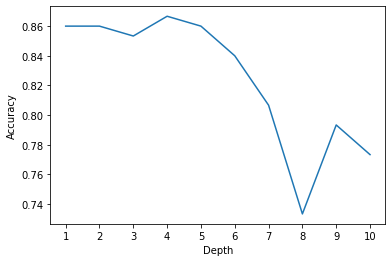

Features: ['Sex-OneHot-F', 'Sex-OneHot-M', 'ChestPainType-OneHot-ASY', 'ChestPainType-OneHot-ATA', 'ChestPainType-OneHot-NAP', 'ChestPainType-OneHot-TA', 'RestingECG-OneHot-LVH', 'RestingECG-OneHot-Normal', 'RestingECG-OneHot-ST', 'ExerciseAngina-OneHot-N', 'ExerciseAngina-OneHot-Y', 'ST_Slope-OneHot-Down', 'ST_Slope-OneHot-Flat', 'ST_Slope-OneHot-Up', 'Sex-TargetEncoded', 'ChestPainType-TargetEncoded', 'RestingECG-TargetEncoded', 'ExerciseAngina-TargetEncoded', 'ST_Slope-TargetEncoded', 'Age-Scaled', 'RestingBP-Scaled', 'Cholesterol-Scaled', 'FastingBS-Scaled', 'MaxHR-Scaled', 'Oldpeak-Scaled', 'Age-MinMax', 'RestingBP-MinMax', 'Cholesterol-MinMax', 'FastingBS-MinMax', 'MaxHR-MinMax', 'Oldpeak-MinMax']


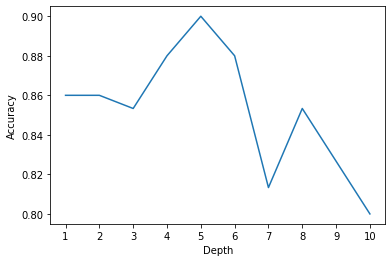

In [ ]:
for features in feature_experiments:
  print(f'Features: {features}')
  feature_name = ';'.join(X_train_all[features].columns)
  acc = df.loc[df['Features'] == feature_name]

  increasing_depth = sns.lineplot(data=acc, x="Hyperparameters", y="Testing Accuracy")
  increasing_depth.set_xlabel("Depth")
  increasing_depth.set_ylabel("Accuracy")
  plt.show()

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        71
           1       0.93      0.86      0.89        79

    accuracy                           0.89       150
   macro avg       0.89      0.90      0.89       150
weighted avg       0.90      0.89      0.89       150

(0.8933333333333333, 0.932799838159644, 0.9315068493150684, 0.8607594936708861)


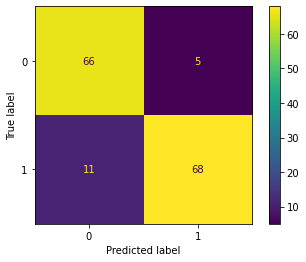

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

features = feature_experiments[2]
X_train = X_train_all[features]
X_test = X_test_all[features]
model = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(classification_report(y_test, y_pred_test))
print(getScores(y_test, y_pred_test))

# Confusion Matrix for one of our best run of Decision Tree
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atlea

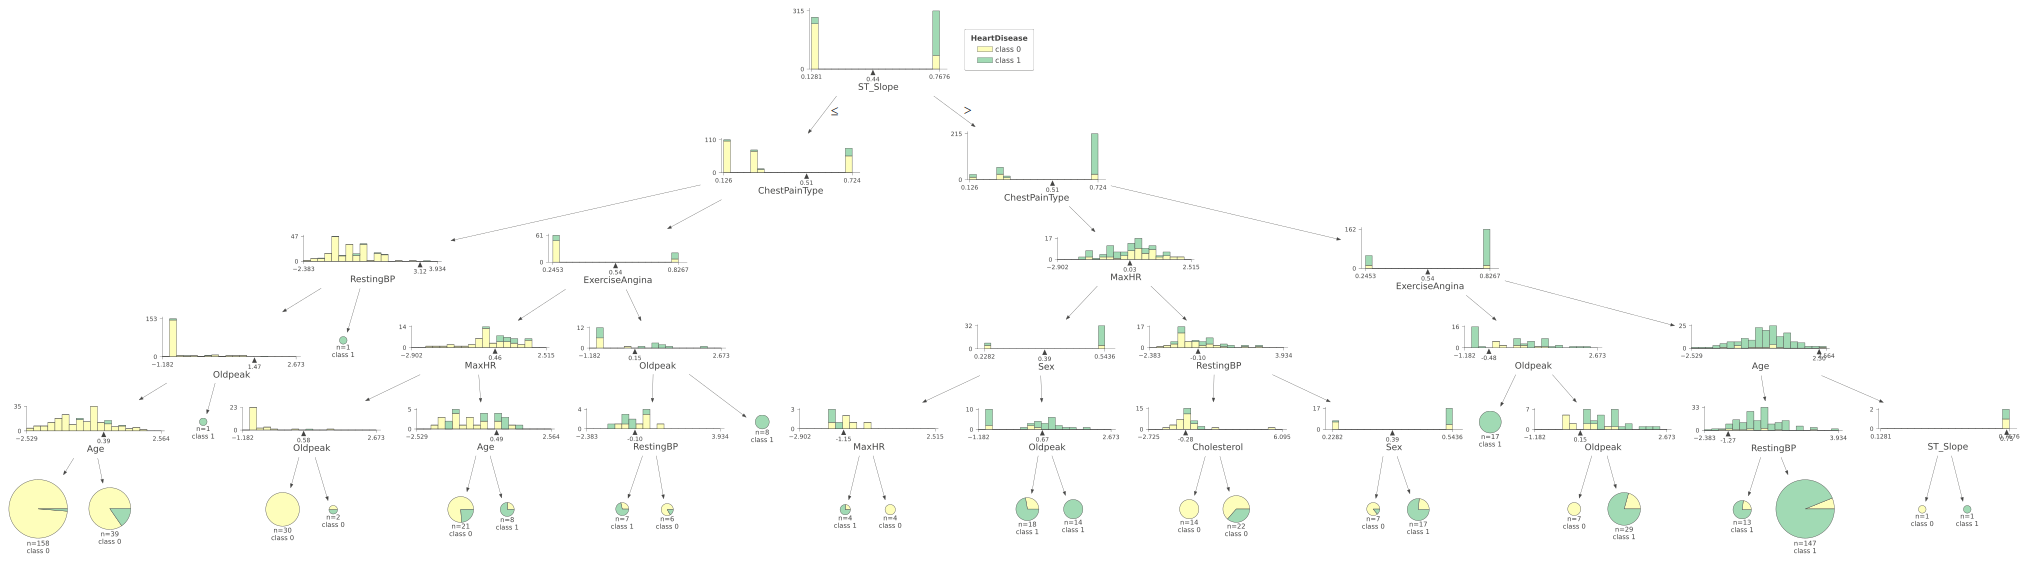

In [ ]:
# !pip install dtreeviz
from dtreeviz.trees import dtreeviz

feature_names = fea = [f.split('-')[0] for f in X_train.columns] 
viz = dtreeviz(model, X_train, y_train,
                target_name=label_feature,
                feature_names=feature_names)

viz.save("decision_tree.svg")
viz

In [ ]:
from sklearn.linear_model import LogisticRegression

# Tune different solver hyperparameters
SOLVERS = ['newton-cg', 'liblinear', 'sag', 'saga']

for features in feature_experiments:
  for solver in SOLVERS: 
    X_train = X_train_all[features]
    X_test = X_test_all[features]

    model = LogisticRegression(max_iter=10000, solver=solver).fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    addData(name='LR', features=';'.join(X_train.columns), model_type='LogisticRegression', hyperparameters=f'{solver}', epochs=f'{model.n_iter_[0]}', 
            training_scores=getScores(y_train, y_pred_train), testing_scores=getScores(y_test, y_pred_test))

In [ ]:
logr = pd.DataFrame(data)
logr = logr[logr['Model Type'] == 'LogisticRegression']

logr_accuracy_sorted = logr.sort_values(by=['Testing Accuracy'], ascending=False)
logr_accuracy_sorted.to_csv('LogisticRegression.csv')
logr_accuracy_sorted.head(10)

,Experiment Name,Features,Model Type,Epochs,Hyperparameters,Training Accuracy,Testing Accuracy,Training PR-AUC,Testing PR-AUC,Training Precision,Testing Precision,Training Recall,Testing Recall
60,LR,Age;RestingBP;Cholesterol;FastingBS;MaxHR;Oldp...,LogisticRegression,31,newton-cg,0.848993,0.900000,0.874424,0.936258,0.828070,0.932432,0.851986,0.873418
73,LR,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,LogisticRegression,5,liblinear,0.855705,0.893333,0.879865,0.930042,0.835088,0.920000,0.859206,0.873418
75,LR,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,LogisticRegression,108,saga,0.852349,0.893333,0.876955,0.930042,0.829268,0.920000,0.859206,0.873418
74,LR,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,LogisticRegression,45,sag,0.852349,0.893333,0.876955,0.930042,0.829268,0.920000,0.859206,0.873418
72,LR,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,LogisticRegression,11,newton-cg,0.852349,0.893333,0.876955,0.930042,0.829268,0.920000,0.859206,0.873418
65,LR,Age-Scaled;RestingBP-Scaled;Cholesterol-Scaled...,LogisticRegression,6,liblinear,0.854027,0.886667,0.878608,0.926506,0.834507,0.918919,0.855596,0.860759
66,LR,Age-Scaled;RestingBP-Scaled;Cholesterol-Scaled...,LogisticRegression,133,sag,0.854027,0.886667,0.878608,0.926506,0.834507,0.918919,0.855596,0.860759
82,LR,Sex-OneHot-F;Sex-OneHot-M;ChestPainType-OneHot...,LogisticRegression,232,sag,0.854027,0.886667,0.878608,0.926506,0.834507,0.918919,0.855596,0.860759
81,LR,Sex-OneHot-F;Sex-OneHot-M;ChestPainType-OneHot...,LogisticRegression,5,liblinear,0.855705,0.886667,0.879865,0.926506,0.835088,0.918919,0.859206,0.860759
80,LR,Sex-OneHot-F;Sex-OneHot-M;ChestPainType-OneHot...,LogisticRegression,14,newton-cg,0.854027,0.886667,0.878608,0.926506,0.834507,0.918919,0.855596,0.860759


              precision    recall  f1-score   support

           0       0.86      0.89      0.88        71
           1       0.90      0.87      0.88        79

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150

(0.88, 0.918094142144775, 0.8961038961038961, 0.8734177215189873)


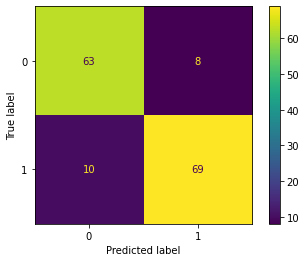

In [ ]:
features = feature_experiments[2]
X_train = X_train_all[features]
X_test = X_test_all[features]
model = LogisticRegression(solver='newton-cg').fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(classification_report(y_test, y_pred_test))
print(getScores(y_test, y_pred_test))

# Confusion Matrix for one of our best run of Logistic Regression
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

In [ ]:
from sklearn.neural_network import MLPClassifier

SOLVER = 'adam'
ACTIVATION = 'relu'

SIZES = [
  (3, 2),
  (4, 1),
  (4, 2),
  (4, 3),
  (5, 5),
  (10, 10)
]

RATES = [
  100,
  10,
  1,
  0.1,
  0.01,
]

for features in feature_experiments:
  for size in SIZES:
    for rate in RATES:
      X_train = X_train_all[features]
      X_test = X_test_all[features]
      model = MLPClassifier(max_iter=5000, solver=SOLVER, activation=ACTIVATION, hidden_layer_sizes=size, learning_rate_init=rate).fit(X_train, y_train)

      y_pred_train = model.predict(X_train)
      y_pred_test = model.predict(X_test)

      addData(name='NN', features=';'.join(X_train.columns), model_type='MLPClassifier', hyperparameters=f'hlsize: {size}, rate: {rate}', 
              training_scores=getScores(y_train, y_pred_train), testing_scores=getScores(y_test, y_pred_test))

In [ ]:
nn = pd.DataFrame(data)
top_accuacy_nn_df = nn.loc[nn['Model Type'] == 'MLPClassifier'].sort_values(by='Testing Accuracy', ascending=False)
top_accuacy_nn_df.to_csv('NN.csv')
top_accuacy_nn_df.head(10)

,Experiment Name,Features,Model Type,Epochs,Hyperparameters,Training Accuracy,Testing Accuracy,Training PR-AUC,Testing PR-AUC,Training Precision,Testing Precision,Training Recall,Testing Recall
228,NN,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,MLPClassifier,,"hlsize: (5, 5), rate: 0.01",0.855705,0.920000,0.879309,0.941811,0.828179,0.913580,0.870036,0.936709
148,NN,Age-Scaled;RestingBP-Scaled;Cholesterol-Scaled...,MLPClassifier,,"hlsize: (3, 2), rate: 0.01",0.859060,0.920000,0.884926,0.949367,0.858736,0.946667,0.833935,0.898734
188,NN,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,MLPClassifier,,"hlsize: (4, 2), rate: 0.01",0.860738,0.920000,0.883427,0.949367,0.834483,0.946667,0.873646,0.898734
208,NN,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,MLPClassifier,,"hlsize: (3, 2), rate: 0.01",0.860738,0.920000,0.884062,0.946562,0.841549,0.935065,0.862816,0.911392
192,NN,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,MLPClassifier,,"hlsize: (4, 3), rate: 0.1",0.880872,0.913333,0.900742,0.943139,0.865248,0.934211,0.880866,0.898734
233,NN,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,MLPClassifier,,"hlsize: (10, 10), rate: 0.01",0.872483,0.906667,0.894045,0.942645,0.857651,0.945205,0.870036,0.873418
232,NN,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,MLPClassifier,,"hlsize: (10, 10), rate: 0.1",0.850671,0.906667,0.874784,0.930804,0.813333,0.891566,0.880866,0.936709
227,NN,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,MLPClassifier,,"hlsize: (5, 5), rate: 0.1",0.855705,0.906667,0.880570,0.939705,0.842294,0.933333,0.848375,0.886076
178,NN,Age-MinMax;RestingBP-MinMax;Cholesterol-MinMax...,MLPClassifier,,"hlsize: (3, 2), rate: 0.01",0.855705,0.900000,0.879478,0.933564,0.830450,0.921053,0.866426,0.886076
163,NN,Age-Scaled;RestingBP-Scaled;Cholesterol-Scaled...,MLPClassifier,,"hlsize: (4, 3), rate: 0.01",0.880872,0.900000,0.901814,0.936258,0.873188,0.932432,0.870036,0.873418


['Age-MinMax', 'RestingBP-MinMax', 'Cholesterol-MinMax', 'FastingBS-MinMax', 'MaxHR-MinMax', 'Oldpeak-MinMax', 'Sex-TargetEncoded', 'ChestPainType-TargetEncoded', 'RestingECG-TargetEncoded', 'ExerciseAngina-TargetEncoded', 'ST_Slope-TargetEncoded']
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        71
           1       0.94      0.91      0.92        79

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

(0.92, 0.9465620033974463, 0.935064935064935, 0.9113924050632911)


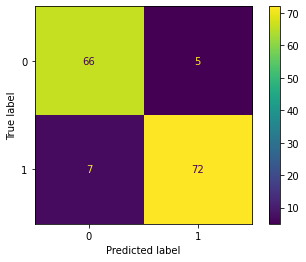

In [ ]:
features = feature_experiments[4]
print(features)
X_train = X_train_all[features]
X_test = X_test_all[features]
model = MLPClassifier(max_iter=5000, solver=SOLVER, activation=ACTIVATION, 
                      hidden_layer_sizes=(5,5), 
                      learning_rate_init=0.01).fit(X_train, y_train)

y_pred_test = model.predict(X_test)

print(classification_report(y_test, y_pred_test))
print(getScores(y_test, y_pred_test))

# Confusion Matrix for one of our best run of Logistic Regression
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)